<h2 style="color:blue">Learning Rate</h2> 
<h3 style="color:blue">To Explained learning effected, custom mini batch KMeans algo has been developed. As the we get more batch, the learning rate reduces and we get converge centroid faster.</h3> 



In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import numpy as np
import random as rd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



In [5]:
#Input Dataset --> Convert into n*d matrix 
img= mpimg.imread('Image1.jpeg') 
x,y,z = img.shape
image_2d = img.reshape(x * y, z)
X=image_2d

In [6]:
class KmeansMiniBatch:
    def __init__(self,X,K,batch_size=100):
        self.XOrg=X
        self.Output={}
        self.batchIndex=0
        self.Centroids=np.array([],dtype =np.float32).reshape(X.shape[1],0)
        self.K=K
        self.m=batch_size
        
        ## ReShuffle the input Data
        self.XIndices = np.random.choice(X.shape[0], X.shape[0], replace=False)
        self.centrArray=None
       
    ## Get the Mini Batch
    def getBatch(self):
        arr = np.array([self.XOrg[self.XIndices[self.batchIndex]]] , dtype=np.float32) 
        for index in np.arange(self.batchIndex+1, self.batchIndex+self.m):
            arr = np.append(arr,[self.XOrg[self.XIndices[index]]],axis=0)
        self.batchIndex = self.batchIndex + self.m 
        return arr
            
    
    #Initialize the Centroid
    def kmeansRandomInit(self,X,K):
        indices = np.random.choice(X.shape[0], K, replace=False)
        clusterMeans=np.array([X[indices[0]]] , dtype=np.float32) 
        indices=np.delete(indices,0)
        for loopEle in indices : 
            clusterMeans=np.append(clusterMeans,[X[loopEle]],axis=0)
        #print("Initial Centroid ", clusterMeans)
        return clusterMeans.T
    
    # To visualize learning rate effect
    def copyCentroid(self, cc):
        if self.centrArray is None : 
            self.centrArray={}
            for k in range(self.K):
                self.centrArray[k+1]=[]
        else : 
            for k in range(self.K):
                self.centrArray[k+1].append(cc[k,:])
        
    
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeansRandomInit(self.XOrg,self.K)
        #Copy Centroid for learning plot 
        self.copyCentroid(self.Centroids.T)
        ## Point exist in each cluster 
        self.v = np.zeros(self.K)
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            self.X = self.getBatch()
            EuclidianDistance=np.array([]).reshape(self.m,0)
            #print("EuclidianDistance",EuclidianDistance)
            for k in range(self.K):
                data =self.X-self.Centroids[:,k]
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                ##np.c_ ==> Translates slice objects to concatenation along the second axis.
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
                
            C=np.argmin(EuclidianDistance,axis=1)+1
            #print("C",C)
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(self.X.shape[1],0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            centr= self.Centroids.copy()
            for k in range(self.K):
                for ele in Y[k+1]:
                    self.v[k]=self.v[k]+1
                    eta = 1/self.v[k]
                    centr[:,k]=centr[:,k]-(eta *( centr[:,k]- ele))
            self.copyCentroid(centr.T)
            if(np.all(np.equal(self.Centroids,centr))) :
                counter =counter+1
            else : 
                counter =0
            
            if counter >10 : 
                print("Stop it here ")
            self.Centroids=centr
            self.Output=Y
        
    def calculateLabel(self):
        EuclidianDistance=np.array([]).reshape(self.XOrg.shape[0],0)
        for k in range(self.K):
            tempDist=np.sum((self.XOrg-self.Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)
        return C
    
    def getCentroids(self):
        return self.Centroids.T.astype('uint8')

        

<p style="color:blue"> As The iteration count increase the cluster centroid become constant and near to constant. </p>

<h3 style="color:blue"> The centroid converge fast and we dont have to give higher iteration to find optimum points. Even the same has been explained using images. With increase number of iteration </h3>

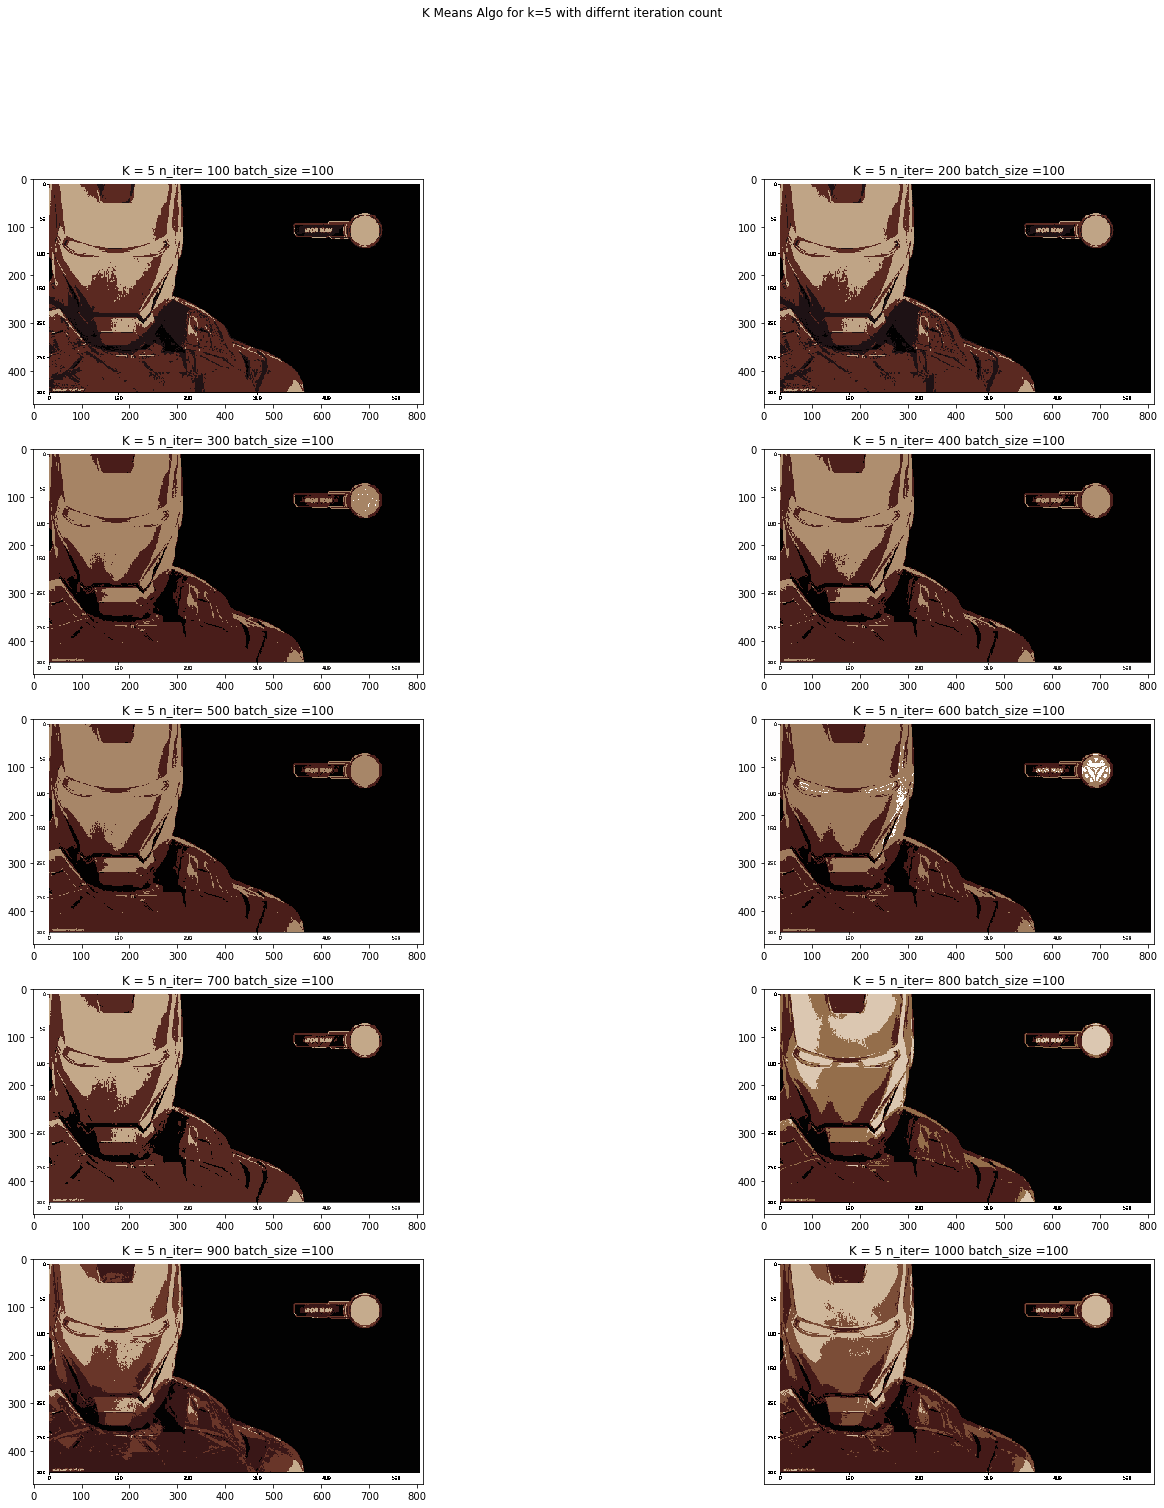

In [7]:
n_iter=1000
batch_size=100
figure_size=8
maxCol =2
maxRow =10
K=5
maxK=11
maxRow =int((maxK-1)/maxCol)
if (maxK-1)%maxCol !=0 : 
    maxRow =maxRow+1
fig, axs = plt.subplots(maxRow,maxCol,figsize=(24,24)) 
fig.suptitle('K Means Algo for k=5 with differnt iteration count',fontdict={'fontsize': 18, 'fontweight': 'medium'})
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False) 
i=0
j =0
for iter in range(1,maxK,1):
    kmeans=KmeansMiniBatch(X,K,batch_size=batch_size)
    kmeans.fit(iter*100)
    means = kmeans.getCentroids()
    labels=kmeans.calculateLabel()
    
    axs[i,j].imshow(np.array(means[labels].reshape(x, y, z),np.int32))
    axs[i,j].title.set_text('K = ' +str(K)+" n_iter= "+str(iter*100)+" batch_size ="+str(batch_size) )
    j=j+1
    if(j%maxCol==0):
        j=0
        i=i+1
    

<h3 style="color:blue"> As we increase iteration ,centroid does not change at that pace. It become constant. The smae has been explained with Scatter plots for . <ul><li>k=3</li><li>k=5</li><li>k=8</li> </h3>

In [9]:
def ImageSegmentation(X,K,n_iter=1000,batch_size=100,figure_size=8, showConverge =True):
    kmeans=KmeansMiniBatch(X,K,batch_size=batch_size)
    kmeans.fit(n_iter)
    means = kmeans.getCentroids()
    labels=kmeans.calculateLabel()
    plt.figure(figsize=(figure_size,figure_size)) 
    plt.title('Segmented Image when K = ' +str(K)+" n_iter= "+str(n_iter)+" batch_size ="+str(batch_size) ) 
    plt.imshow(np.array(means[labels].reshape(x, y, z),np.int32))
    
    #plt.title("Centroid Converge faster and become constant with usage of learning rate ")
    if showConverge : 
        for k in range(kmeans.K ):
            pltData =np.array(kmeans.centrArray[k+1])
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.title.set_text("Centroid "+str(k+1))
            sp = ax.scatter(pltData[:,0],pltData[:,1],pltData[:,2], c=pltData[:,3],    cmap=plt.hot())
            plt.colorbar(sp)



<p style="color:blue">Display of centroid for k =3</p>

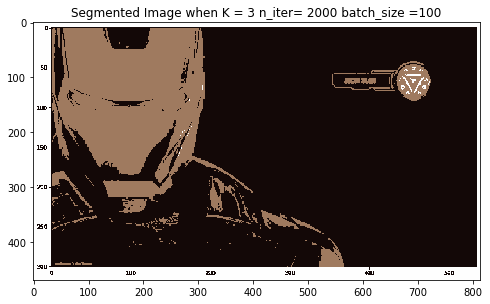

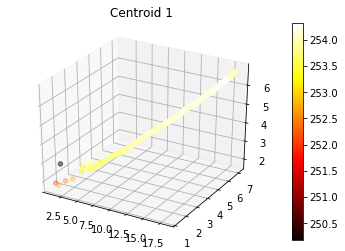

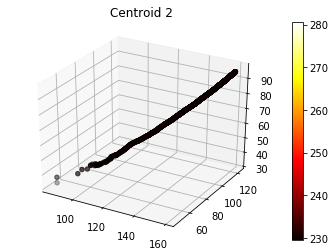

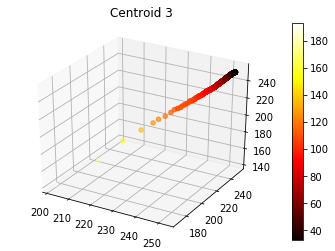

In [10]:
ImageSegmentation(X,3,2000)

<p style="color:blue">Display of centroid for k =5</p>

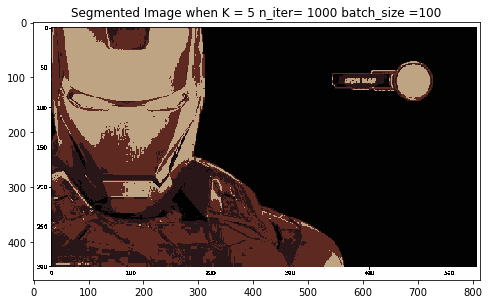

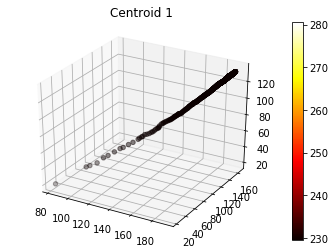

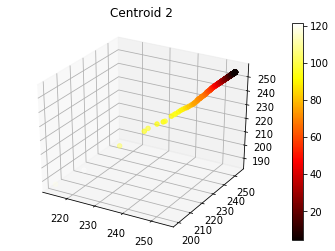

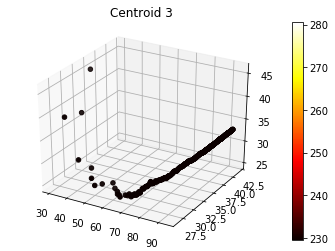

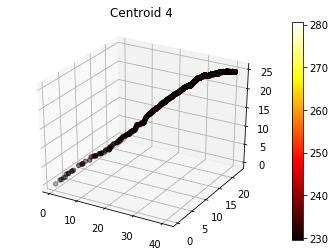

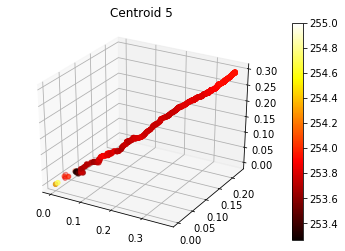

In [11]:
ImageSegmentation(X,5)


<p style="color:blue">Display of centroid for k =8</p>

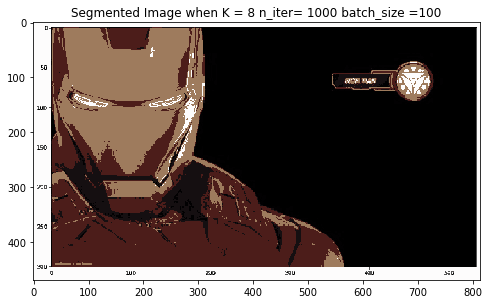

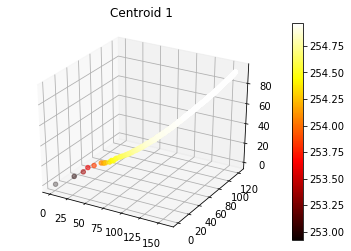

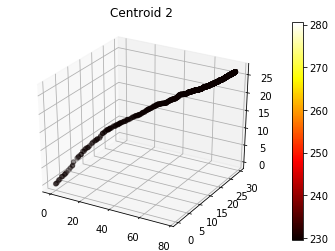

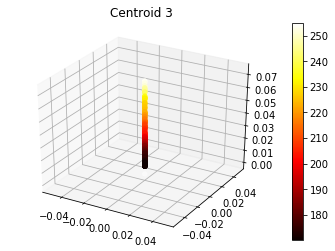

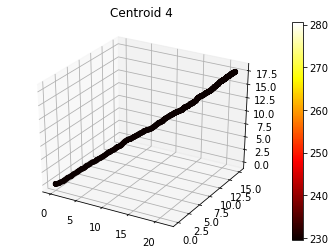

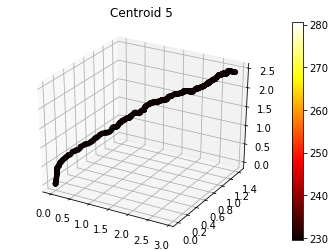

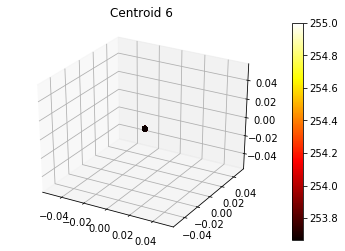

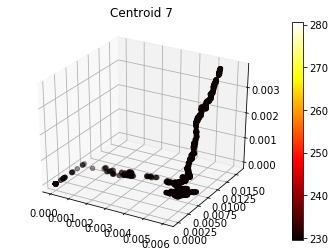

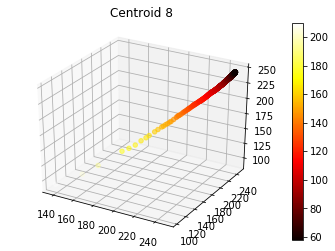

In [13]:
ImageSegmentation(X,8)
